# [Understanding PyTorch with an example: a step-by-step tutorial](https://medium.com/towards-data-science/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e)

- By [Daniel Godoy](https://medium.com/@dvgodoy), May 7, 2019, 21 min read
- From [medium](https://medium.com/towards-data-science/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e)
- Tailored customized for Ivan HP Lin, (WIP - Pytoch - autograd)


PyTorch is also very pythonic, meaning, it feels more natural to use it if you already are a Python developer.

Besides, using PyTorch may even improve your health, according to [Andrej Karpathy](https://twitter.com/karpathy/status/868178954032513024) :-)

**PyTorch** is the **fastest growing** Deep Learning framework and it is also used by **Fast.ai** in its MOOC, [Deep Learning for Coders](https://course.fast.ai/) and its [library](https://docs.fast.ai/)

Since this is quite a **long post**, I built a Table of Contents to make navigation easier, should you use it as a **mini-course** and work your way through the content one topic at a time

* Table of Contents
  - A Simple Regression Problem
  - Gradient Descent
  - Linear Regression in Numpy
  - PyTorch
  - Autograd
  - Dynamic Computation Graph
  - Optimizer
  - Loss
  - Model
  - Dataset
  - DataLoader
  - Evaluation

## A Simple Regression Problem

In this tutorial, I will stick with a simple and familiar problem: a linear regression with a single feature $x$! It doesn’t get much simpler than that
<figure>
<center>
<img src="https://miro.medium.com/max/282/1*a7_GUQQT5BjvAhh3qq0JwA.png" width="35%">
<figcaption>Simple Linear Regression model</figcaption></center>
</figure>

### Data Generation
Let’s start generating some **synthetic data**: we start with a vector of 100 points for our **feature** $\bf x$ and create our **labels** using $a = 1, b = 2$ and some Gaussian noise $ϵ$.

Next, let’s **split** our synthetic data into **train** and **validation** sets, shuffling the array of indices and using the first 80 shuffled points for training.

In [1]:
import numpy as np
from matplotlib import pyplot

# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

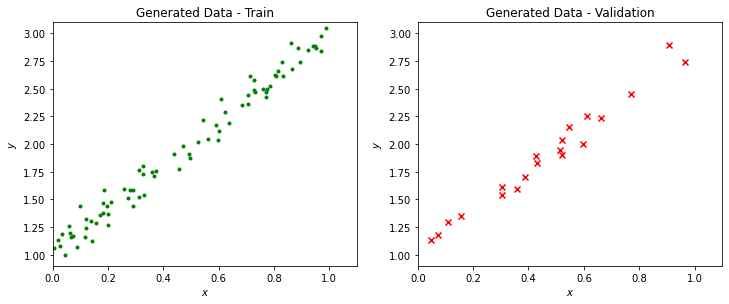

In [2]:
f, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12,8)) 

ax1.set_title('Generated Data - Train')
ax1.set_xlabel(f'$x$')
ax1.set_ylabel(f'$y$')
ax1.set_xlim(0, 1.1)
ax1.set_ylim(0.9, 3.1)
ax1.set_aspect(0.4)
ax1.scatter(x_train, y_train, c='g', marker='.')

ax2.set_title('Generated Data - Validation')
ax2.set_xlabel(f'$x$')
ax2.set_ylabel(f'$y$')
ax2.set_xlim(0, 1.1)
ax2.set_ylim(0.9, 3.1)
ax2.set_aspect(0.4)
ax2.scatter(x_val, y_val, c='r', marker='x')

pyplot.show()

We know that $a = 1$ and $b = 24$, but now let’s see how close we can get to the true values by using **gradient descent** and the 80 points in the **training set**…

## Gradient Descent

### Step 1: Compute the Loss

For a regression problem, the loss is given by the **Mean Square Error (MSE)**, that is, the average of all squared differences between **labels** ($y$) and **predictions** ($a + bx$).

It is worth mentioning that, 
- if we use **all points** in the training set ($N$) to compute the loss, we are performing a **batch** gradient descent. 
- If we were to use a single point at each time, it would be a **stochastic** gradient descent. 
- Anything else (n) **in-between 1 and N** characterizes a **mini-batch** gradient descent

<figure>
<center>
<img src="https://miro.medium.com/max/518/1*7fmJUcQT578OBfX7Q8hluQ.png" width="50%">
<figcaption>Loss: Mean Squared Error (MSE)</figcaption></center>

### Step 2: Compute the Gradients

<figure>
<center>
<img src="https://miro.medium.com/max/1050/1*YvTj1B-h1gzSI5F24OgrrA.png" width="70%">
<figcaption>Computing gradients w.r.t coefficients $a$ and $b$</figcaption></center>

### Step 3: Update the Parameters

In the final step, we use the **gradients** to update the parameters. Since we are trying to **minimize** our **losses**, we **reverse the sign** of the gradient for the update.

There is still another parameter to consider: the **learning rate**, denoted by the Greek letter eta $η$ (that looks like the letter n), which is the multiplicative factor that we need to apply to the gradient for the parameter update.

<figure>
<center>
<img src="https://miro.medium.com/max/314/1*eWnUloBYcSNPRBzVcaIr1g.png" width="30%">
<figcaption>Updating coefficients $a$ and $b$ using computed gradients and a learning rate</figcaption></center>

### Step 4: Rinse and Repeat!

Now we use the updated parameters to go back to Step 1 and restart the process.

* An **epoch is complete whenever every point has been already used for computing the loss**. 
  - For **batch** gradient descent, this is trivial, as it uses all points for computing the loss — one epoch is the same as one update. 
  - For **stochastic** gradient descent, one epoch means $N$ updates, 
  - For **mini-batch** (of size $n$), one epoch has ${N} \over {n}$ updates.

## Linear Regression in Numpy

For training a model, there are **two initialization steps**:

* Random initialization of parameters/weights (we have only two, a and b) — lines 3 and 4;
* Initialization of hyper-parameters (in our case, only learning rate and number of epochs) — lines 9 and 11;

Make sure to always initialize your random seed to ensure reproducibility of your results. As usual, the random seed is 42, the least random of all random seeds one could possibly choose :-)


For each epoch, there are four training steps:
1. Compute model’s predictions — this is the **forward pass** — line 15;
2. Compute the loss, using predictions and and labels and the appropriate **loss function** for the task at hand — lines 18 and 20;
3. Compute the **gradients** for every parameter — lines 23 and 24;
4. **Update the parameters** — lines 27 and 28;

Just keep in mind that, if you don’t use batch gradient descent (our example does),you’ll have to write an **inner loop** to perform the **four training steps** for either each **individual point (stochastic)** or **$n$ points (mini-batch)**. We’ll see a mini-batch example later down the line.

In [3]:
import numpy as np
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(f'a and b at initialization: {a}, {b}]')

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(f'a and b after our gradient descent: {a}, {b}]')

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(f'intercept and coef from Scikit-Learn: {linr.intercept_}, {linr.coef_[0]}')

a and b at initialization: [0.49671415], [-0.1382643]]
a and b after our gradient descent: [1.02354094], [1.96896411]]
intercept and coef from Scikit-Learn: [1.02354075], [1.96896447]


## PyTorch

### Tensor
In Numpy, you may have an **array** that has **three dimensions**, right? That is, technically speaking, a **tensor**.

A **scalar** (a single number) has **zero** dimensions, a **vector has one** dimension, a **matrix has two** dimensions and a **tensor has three or more** dimensions. That’s it!

But, to keep things simple, it is commonplace to call vectors and matrices tensors as well — so, from now on, **everything is either a scalar or a tensor**.

### Loading Data, Devices and CUDA
”*How do we go from Numpy’s arrays to PyTorch’s tensors*”, you ask? That’s what ***from_numpy*** is good for. It returns a **CPU tensor**, though.

“But I want to use my fancy **GPU…”**, you say. No worries, that’s what ***to()*** is good for. It sends your tensor to whatever **device** you specify, including your **GPU** (referred to as **cuda** or **cuda:0**).

“*What if I want my code to fallback to CPU if no GPU is available*?”, you may be wondering… PyTorch got your back once more — you can use ***cuda.is_available()*** to find out if you have a GPU at your disposal and set your device accordingly.

You can also easily **cast** it to a lower precision (32-bit float) using ***float()***.

In [4]:
! pip install torchviz


  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=f545cf22b7216b2208616eac6d630f3dfb97aecd6b09b6af6004ca6456989be3
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [5]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(f'device={device}')
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

device=cpu
<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


If you compare the types of both variables, you’ll get what you’d expect: **numpy.ndarray** for the first one and **torch.Tensor** for the second one.

But where does your nice tensor “live”? In your CPU or your GPU? You can’t say… but if you use PyTorch’s type(), it will reveal its location — **torch.cuda.FloatTensor** — a GPU tensor in this case.

### Creating Parameters

What distinguishes a tensor used for data — like the ones we’ve just created — from a **tensor** used as a (***trainable***)** parameter/weight**?

The latter tensors require the **computation of its gradients**, so we can **update** their values (the parameters’ values, that is). That’s what the ***requires_grad=True*** argument is good for. It tells PyTorch we want it to compute gradients for us.

You may be tempted to create a simple tensor for a parameter and, later on, send it to your chosen device, as we did with our data, right? Not so fast…

In [7]:
# FIRST
# Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)
# Sorry, but NO! The to(device) "shadows" the gradient...

# THIRD
# We can either create regular tensors and send them to the device (as we did with our data)
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-0.8461], requires_grad=True) tensor([-0.5389], requires_grad=True)
tensor([-0.2595], requires_grad=True) tensor([0.7324], requires_grad=True)
tensor([-0.1909], requires_grad=True) tensor([-0.8241], requires_grad=True)


The first chunk of code creates two nice tensors for our parameters, gradients and all. But they are CPU tensors.
```
# FIRST
tensor([-0.5531], requires_grad=True)
tensor([-0.7314], requires_grad=True)
```

In the second chunk of code, we tried the naive approach of sending them to our GPU. We succeeded in sending them to another device, but we ”lost” the gradients somehow…
```
# SECOND
tensor([0.5158], device='cuda:0', grad_fn=<CopyBackwards>) tensor([0.0246], device='cuda:0', grad_fn=<CopyBackwards>)
```

In the third chunk, we first send our tensors to the device and then use requires_grad_() method to set its requires_grad to True in place.

```
# THIRD
tensor([-0.8915], device='cuda:0', requires_grad=True) tensor([0.3616], device='cuda:0', requires_grad=True)
```

In PyTorch, every method that ends with an ***underscore (_)*** makes **changes in-place**, meaning, they will **modify** the underlying variable.

Although the last approach worked fine, it is much better to assign tensors to a device at the moment of their creation.

In [8]:
# We can specify the device at the moment of creation - RECOMMENDED!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


## Dynamic Computation Graph

## Optimizer

## Loss

## Model

## Dataset

## DataLoader

## Evaluation